In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
import seaborn as sns

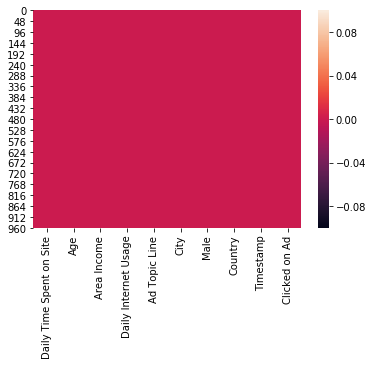

In [5]:
sns.heatmap(df.isnull())

In [6]:
df['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

In [7]:
df.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


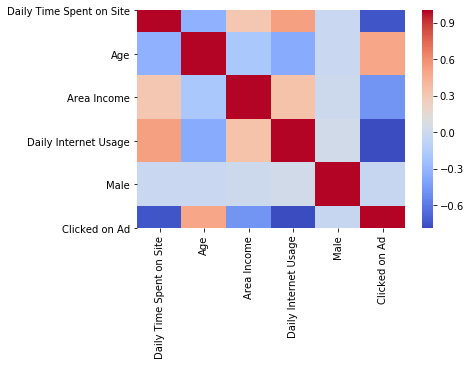

In [8]:
sns.heatmap(df.corr(),cmap=('coolwarm'))

In [9]:
df.drop('Male',axis=1,inplace=True)

In [10]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,Nauru,2016-04-04 01:39:02,0


In [11]:
df.drop('Country',axis=1,inplace=True)

In [12]:
df.drop('Ad Topic Line',axis=1,inplace=True)

In [14]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,West Jodi,2016-04-04 01:39:02,0


In [15]:
df['Timestamp']= pd.to_datetime(df['Timestamp'])

In [16]:
df['Hour']=df['Timestamp'].apply(lambda x:x.hour)
df['Minute']= df['Timestamp'].apply(lambda x:x.minute)
df['Second']= df['Timestamp'].apply(lambda x:x.second)

In [17]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Timestamp,Clicked on Ad,Hour,Minute,Second
0,68.95,35,61833.90,256.09,Wrightburgh,2016-03-27 00:53:11,0,0,53,11
1,80.23,31,68441.85,193.77,West Jodi,2016-04-04 01:39:02,0,1,39,2


In [18]:
df['Date']= df['Timestamp'].apply(lambda x:x.date())

In [19]:
df.drop('Date',axis=1,inplace=True)

In [29]:
df.drop('Timestamp',axis=1,inplace=True)

In [26]:
df.drop('City',axis=1,inplace=True)

In [27]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Timestamp,Clicked on Ad,Hour,Minute,Second
0,68.95,35,61833.90,256.09,2016-03-27 00:53:11,0,0,53,11
1,80.23,31,68441.85,193.77,2016-04-04 01:39:02,0,1,39,2
2,69.47,26,59785.94,236.50,2016-03-13 20:35:42,0,20,35,42
3,74.15,29,54806.18,245.89,2016-01-10 02:31:19,0,2,31,19
4,68.37,35,73889.99,225.58,2016-06-03 03:36:18,0,3,36,18


In [35]:
df.drop(['Hour','Minute','Second'], axis=1,inplace=True)

In [42]:
df.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,0


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
ss= StandardScaler()

In [45]:
scaled_array= ss.fit_transform(df.drop('Clicked on Ad',axis=1))

In [46]:
X=pd.DataFrame(data = scaled_array,columns=df.columns[:-1])

In [49]:
Y=df['Clicked on Ad']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression()

In [54]:
model.fit(X_train,Y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
ypred= model.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
confusion_matrix(Y_test,ypred)

array([[164,   2],
       [  3, 131]], dtype=int64)